# Sentiment analysis on 'Elon_musk' dataset

In [93]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [94]:
# load dataset
data = pd.read_csv('Elon_musk.csv',encoding = 'latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## EDA

In [95]:
#droping unwanted column
data=data.drop('Unnamed: 0',axis=1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [96]:
data.shape

(1999, 1)

dataset has 1999 rows and 1 column.

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [98]:
# missing value by applying function
data.isnull().sum()

Text    0
dtype: int64

No Missing values and datatype also identified accuretly

In [99]:
# checking duplicate rows
data.duplicated().sum()

2

dataset has 2 duplicate tweets ,so we need to drop them.

In [100]:
# droping duplicate rows
data=data.drop_duplicates()

In [101]:
len(data.Text.unique())

1997

## Text Processing

In [102]:
# Converting into Lower case
data['Text']=data['Text'].str.lower()
data.head()

,Text
0,@kunalb11 im an alien
1,@id_aa_carmack ray tracing on cyberpunk with h...
2,@joerogan @spotify great interview!
3,@gtera27 doge is underestimated
4,@teslacn congratulations tesla china for amazi...


In [103]:
# Removing user name
import re                #regex package(regular expression)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)       #it finds specific words from text
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

# remove user handles
data['clean_text'] = data['Text'].apply(lambda row:remove_pattern(row, "@[\w]*")) #removing words related with '@'' replaced with 'space'


# first five observations
data.head()

,Text,clean_text
0,@kunalb11 im an alien,im an alien
1,@id_aa_carmack ray tracing on cyberpunk with h...,ray tracing on cyberpunk with hdr is next-lev...
2,@joerogan @spotify great interview!,great interview!
3,@gtera27 doge is underestimated,doge is underestimated
4,@teslacn congratulations tesla china for amazi...,congratulations tesla china for amazing execu...


In [104]:
# Removing other unwanted text
import string

def clean_text(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+", '',text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('http[^\s]+', '',text)
    return text

clean = lambda x: clean_text(x)

data["clean_text"] = data["clean_text"].apply(clean_text) # Clean The Text
data.head()

,Text,clean_text
0,@kunalb11 im an alien,im an alien
1,@id_aa_carmack ray tracing on cyberpunk with h...,ray tracing on cyberpunk with hdr is next-lev...
2,@joerogan @spotify great interview!,great interview!
3,@gtera27 doge is underestimated,doge is underestimated
4,@teslacn congratulations tesla china for amazi...,congratulations tesla china for amazing execu...


Tokanization converts sentece into single token,this token is converted into its contextual word with the help of Stamming

In [105]:
# Tokenization,Stammimg and Removing stopwords,punctuations
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+ ['u+','U','\x92','rt','ye','yeah','haha','Yes','u0001f923','I']

# tokenize
data['tokenized_text'] = [nltk.word_tokenize(x) for x in data['clean_text']]

# stopword removal
data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))
data.head()

,Text,clean_text,tokenized_text
0,@kunalb11 im an alien,im an alien,im alien
1,@id_aa_carmack ray tracing on cyberpunk with h...,ray tracing on cyberpunk with hdr is next-lev...,ray trace cyberpunk hdr next-level tri
2,@joerogan @spotify great interview!,great interview!,great interview
3,@gtera27 doge is underestimated,doge is underestimated,doge underestim
4,@teslacn congratulations tesla china for amazi...,congratulations tesla china for amazing execu...,congratul tesla china amaz execut last year ne...


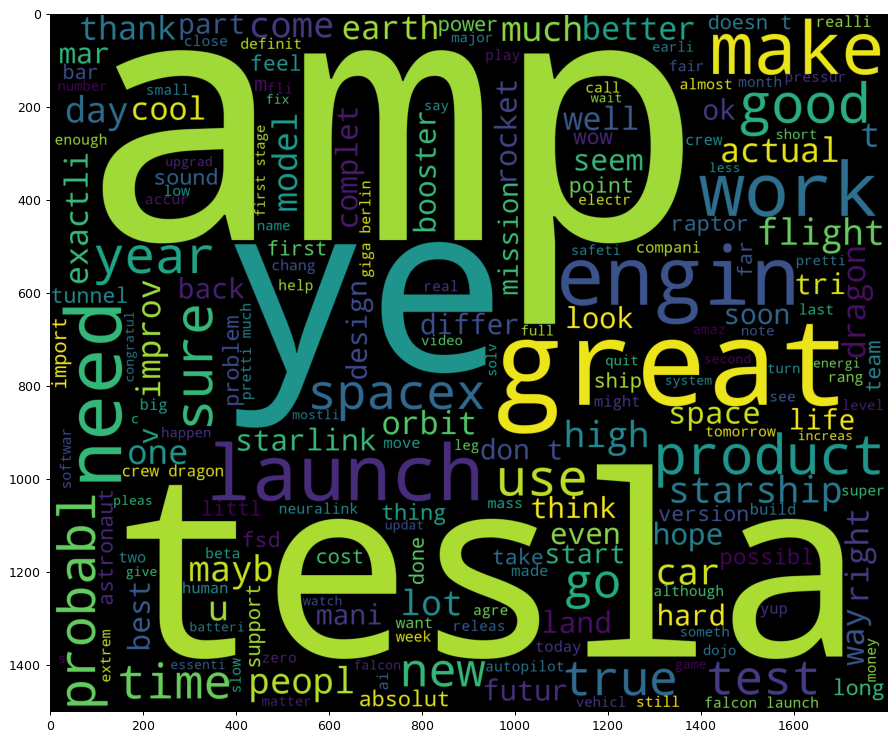

In [106]:
#Generate Word Cloud
#wordcloud for entire corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
string_Total = " ".join(data["tokenized_text"])
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);


In world cloud,The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

As you can see, words like “tesla”,“amp” “launch” “great” and “engin” stand out since they were used more frequently in the original text.

Most of the highlighted words are positive.

## Word Embedding
   - Frequncy Based Embedding
   - Prediction based embedding

### Vectorization-Converting text to numbers & it has three vecterization types
  1. Bag of words
  2. Count vectorizer
  3. Term frequency & inverse document frequency

### Using CountVectorizer
     Count vectoriser tells the frequency of a word.

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9, stop_words='english')
X = vectorizer.fit_transform(data["tokenized_text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head()

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,occurrences,frequency
0,_lsp,2,0.000219
1,aber,1,0.000110
2,abl,6,0.000657
3,abo,1,0.000110
4,aboard,1,0.000110


In [108]:
np.max(word_freq_df['occurrences'])

219

The word which has this max counted frequncy can be context but its not always true so we will do further analyasis

In [109]:
X.shape

(1997, 2844)

In [110]:
print(vectorizer.get_feature_names()[:200])

['_lsp', 'aber', 'abl', 'abo', 'aboard', 'abort', 'absenc', 'absolut', 'absorb', 'absorpt', 'absurd', 'absurdli', 'ac', 'academia', 'accel', 'acceler', 'accelera', 'accept', 'access', 'accid', 'accident', 'accommod', 'account', 'accur', 'accura', 'accuraci', 'ace', 'achi', 'achiev', 'acquisit', 'action', 'activ', 'actual', 'actuari', 'ad', 'adagio', 'add', 'addit', 'address', 'administ', 'adult', 'advanc', 'advantag', 'adventur', 'advertis', 'advic', 'advis', 'aero', 'afb', 'affair', 'affect', 'afford', 'africa', 'afternoon', 'age', 'ago', 'agoni', 'agre', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplan', 'ak', 'aka', 'alert', 'alexand', 'algo', 'algorithm', 'alien', 'align', 'alloc', 'allocati', 'allow', 'alloy', 'aloha', 'alon', 'alpha', 'alreadi', 'altho', 'altit', 'altitud', 'alto', 'aluminum', 'alway', 'amaz', 'amazon', 'america', 'american', 'amp', 'amplif', 'amplitud', 'analog', 'analysi', 'anasis', 'ancient', 'andrej', 'angl', 'annihila', 'announc', 'annoy', 'an

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [111]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
print(vectorizer.vocabulary_)[:100]

{'alien': 72, 'ray': 1978, 'trace': 2575, 'cyberpunk': 588, 'hdr': 1122, 'level': 1396, 'tri': 2591, 'great': 1072, 'interview': 1281, 'doge': 697, 'underestim': 2640, 'congratul': 504, 'tesla': 2505, 'china': 416, 'amaz': 88, 'execut': 843, 'year': 2830, 'happi': 1104, 'new': 1638, 'ox': 1741, 'frodo': 982, 'underdog': 2639, 'thought': 2524, 'fail': 875, 'thank': 2513, 'inde': 1239, 'tweet': 2616, 'definit': 621, 'repres': 2033, 'real': 1986, 'world': 2812, 'time': 2538, 'alloc': 74, 'entertain': 799, 'outcom': 1719, 'like': 1412, 'sent': 2175, 'agre': 57, 'clubhous': 446, 'bought': 302, 'dogecoin': 699, 'lil': 1413, 'toddler': 2548, 'hodler': 1161, 'issu': 1299, 'sentenc': 2176, 'bit': 264, 'high': 1152, 'fix': 928, 'pleas': 1833, 'unlock': 2662, 'account': 22, 'true': 2600, 'power': 1863, 'crypto': 573, 'wallet': 2734, 'won': 2805, 'privat': 1896, 'key': 1333, 'avoid': 191, 'cost': 541, 'app': 118, 'suck': 2410, 'nasa': 1622, 'select': 2167, 'falcon': 879, 'heavi': 1131, 'launch': 1

TypeError: 'NoneType' object is not subscriptable

In above output 'ultra' is key and '300' show its index position in 'toarray output'

i.e 300 position value shows how many time 'ultra' is repeated


In [113]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.9,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

### TFIDF - Term frequency inverse Document Frequencyt
     - It is same as count vectorization just instead of on doucument it consider all
     documents

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["tokenized_text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df.head()

,abl,abort,absolut,acceler,accept,access,accur,achiev,activ,actual,...,wow,write,wrong,ya,ye,year,yesterday,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.374785,0.0,0.0,0.0,0.0


In [115]:
vectorizer.get_feature_names()[:20]

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abl',
 'abort',
 'absolut',
 'acceler',
 'accept',
 'access',
 'accur',
 'achiev',
 'activ',
 'actual',
 'ad',
 'add',
 'advanc',
 'ago',
 'agre',
 'ahead',
 'ahem',
 'ai',
 'aim',
 'air']

In [116]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.5,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

### N-gram 

#### Bi-gram-
     Combination of two words

In [117]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [118]:
top2_words = get_top_n2_words(data["tokenized_text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,crew dragon,14
1,giga berlin,12
2,pretti much,12
3,falcon launch,11
4,first stage,10
5,falcon first,9
6,stage land,9
7,next week,9
8,static fire,9
9,come soon,8


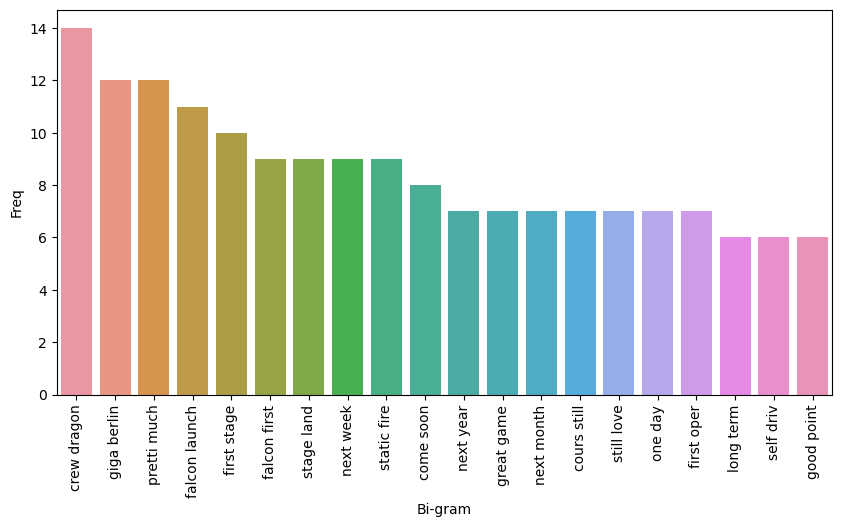

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#### tri-gram
    combination of three words

In [120]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [121]:
top3_words = get_top_n3_words(data["tokenized_text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,falcon first stage,9
1,first stage land,9
2,cours still love,7
3,land cours still,5
4,still love droneship,5
5,dragon first oper,5
6,first oper mission,5
7,falcon launch starlink,4
8,stage land cours,4
9,stage land land,4


The frequncies of 'falcon first stage','first stage land' & 'co http co' are high.Lets check by Visually

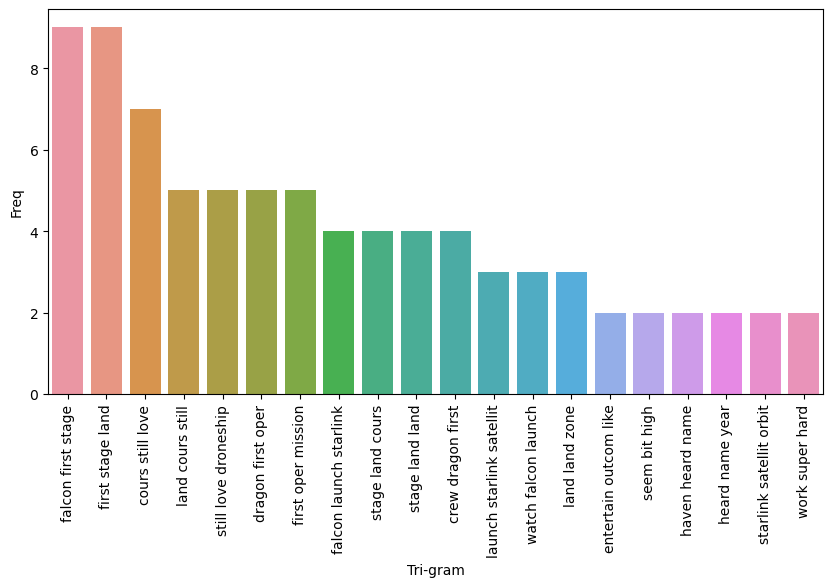

In [122]:
#3 tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

## Subjectivity and Polarity

Sentiment analysis-

                   1.VADER
                   2.Affine
                   3.Text Blob

In [123]:
#Using textblob
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["tokenized_text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data.head(11)

,Text,clean_text,tokenized_text,subjectivity,polarity
0,@kunalb11 im an alien,im an alien,im alien,0.750000,-0.250000
1,@id_aa_carmack ray tracing on cyberpunk with h...,ray tracing on cyberpunk with hdr is next-lev...,ray trace cyberpunk hdr next-level tri,0.000000,0.000000
2,@joerogan @spotify great interview!,great interview!,great interview,0.750000,0.800000
3,@gtera27 doge is underestimated,doge is underestimated,doge underestim,0.000000,0.000000
4,@teslacn congratulations tesla china for amazi...,congratulations tesla china for amazing execu...,congratul tesla china amaz execut last year ne...,0.033333,0.000000
5,happy new year of the ox! https://t.co/9wfkmyu2oj,happy new year of the ox!,happi new year ox,0.454545,0.136364
6,"frodo was the underdoge,\nall thought he would...","frodo was the underdoge,\nall thought he would...",frodo underdog thought would fail,0.300000,-0.500000
7,@owensparks_ @flcnhvy @anonyx10 haha thanks :),haha thanks :),thank,0.000000,0.000000
8,@flcnhvy @anonyx10 indeed! tweets definitely d...,indeed! tweets definitely do not represent r...,inde tweet definit repres real-world time alloc,0.000000,0.000000
9,the most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertain outcom like,0.000000,0.000000


The polarity score is a float within the range [-1.0, 1.0] with negative values corresponding to negative sentiments and positive values to positive sentiments.

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [124]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)

In [125]:
positive_tweets = data[data['analysis'] == 'Positive']
negative_tweets = data[data['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -@joerogan @spotify great interview!
 -happy new year of the ox! https://t.co/9wfkmyu2oj
 -@geoffkeighley @unrealengine its getting real
 -@joshmanmode he definitely has issues, but the sentencing seems a bit high
 -this is true power haha https://t.co/fc9uhqsd7o
negative tweets
 -@kunalb11 im an alien
 -frodo was the underdoge,
all thought he would fail,
himself most of all. https://t.co/zgxjfdzzrm
 -@rationaletienne @adamklotz_ starlink is a staggeringly difficult technical &amp; economic endeavor. however, if we don https://t.co/9z8ac6skqx
 -i am become meme,
destroyer of shorts
 -@madoverlord we were too dumb


The above output are some positive and negative tweets

KeyError: 324

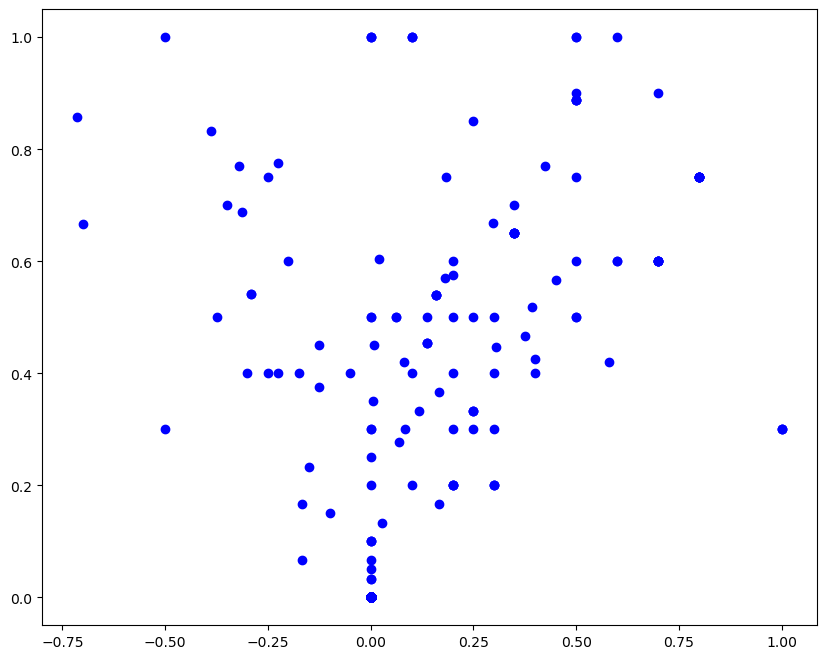

In [126]:
# Visualization of positive ,negative and neutral tweets
plt.figure(figsize=(10, 8))

for i in range(0, data.shape[0]):
    plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "blue")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [128]:
(len(positive_tweets) / len(negative_tweets))*100

375.1515151515151

Conclusion: Since that number is positive with high ratio, we can conclude that Elon Musk is a positive guy.

-------------------------------------------------------------------------------------------------------

# Scrapping 
       1) Extract reviews of any product from ecommerce website like amazon
       2) Perform emotion mining


In [129]:
# importing libraries
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs

## Extracting reviews from amazon for product Samsung Galaxy S20

In [130]:
import requests

samsung_reviews=[]

#Scrapping
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op
samsung_reviews

["\nS20 Ultra is 6.9 inches of pure smoothness and brilliance. I am coming from One Plus 7pro and was looking to upgrade. 8 Pro sounds like a logical choice, but after having used A70 for sometime, wanted to use the great displays Samsung is famous for.Most people buy phones for various reasons. For me there are following things I look for:1. Display quality2. Ease of use3. Safety and security4. Clean interface with possible customisations5. Of course, the basic ability to make and receive audio/video calls with stability.6. Battery lifeS20 Ultra fulfils most above criterion, except maybe the fingerprint reader. I have used OP 7Pro, Oppo, Realme and Mi. Believe me, fingerprint reader implementation by Samsung is the worst.  It will leave you fuming when you need to unlock phone in a hurry. Face recognition is fast, but with 'mask on' situation, face reader is of no use.That for me is the single bad point for all Samsung phones.Before picking up S20 Ultra, I tried Note 20 Ultra and abso

In [131]:
# joining reviews
reviews = ' '.join(samsung_reviews)

## Data Cleaning

In [132]:
# Removing unwanted words and applying lower fuction
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

In [133]:
# Tokenization
from nltk.tokenize import word_tokenize
reviews_token = word_tokenize(reviews)
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]
reviews_without_sw

['ultra',
 'inches',
 'pure',
 'smoothness',
 'brilliance',
 'coming',
 'pro',
 'upgrade',
 'pro',
 'sounds',
 'logical',
 'choice',
 'wanted',
 'great',
 'displays',
 'samsung',
 'famous',
 'buy',
 'phones',
 'reasons',
 'things',
 'display',
 'quality',
 'ease',
 'safety',
 'security',
 'clean',
 'interface',
 'possible',
 'customisations',
 'course',
 'basic',
 'ability',
 'make',
 'receive',
 'audio',
 'video',
 'calls',
 'stability',
 'battery',
 'lifes',
 'ultra',
 'fulfils',
 'criterion',
 'fingerprint',
 'reader',
 'pro',
 'oppo',
 'realme',
 'believe',
 'fingerprint',
 'reader',
 'implementation',
 'samsung',
 'worst',
 'leave',
 'fuming',
 'unlock',
 'phone',
 'hurry',
 'recognition',
 'fast',
 'mask',
 'situation',
 'reader',
 'single',
 'point',
 'samsung',
 'phones',
 'picking',
 'ultra',
 'note',
 'ultra',
 'absolutely',
 'phone',
 'heating',
 'seconds',
 'wise',
 'note',
 'ultra',
 'trumps',
 'ultra',
 'remove',
 'pen',
 'note',
 'ultra',
 'ultra',
 'rectangular',
 'shap

In [134]:
reviews=' '.join(reviews_without_sw)
reviews

'ultra inches pure smoothness brilliance coming pro upgrade pro sounds logical choice wanted great displays samsung famous buy phones reasons things display quality ease safety security clean interface possible customisations course basic ability make receive audio video calls stability battery lifes ultra fulfils criterion fingerprint reader pro oppo realme believe fingerprint reader implementation samsung worst leave fuming unlock phone hurry recognition fast mask situation reader single point samsung phones picking ultra note ultra absolutely phone heating seconds wise note ultra trumps ultra remove pen note ultra ultra rectangular shape pleasing decide pen worth ultra great display colors vibrant pro hz refresh rate qhd great hz refresh rate fhd ultra waaaaay display ultra smooth pleasure scroll buy phone install lock samsung customise part interface make phone themes battery day long hrs sot exynos throttle snapdragon pro faster feel installing apps snapdragon faster exynos decisi

##  Using CountVectorizer

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
textscv=vectorizer.fit_transform(reviews_without_sw)

In [136]:
print(vectorizer.vocabulary_)

{'ultra': 300, 'inches': 138, 'pure': 223, 'smoothness': 267, 'brilliance': 27, 'coming': 49, 'pro': 218, 'upgrade': 303, 'sounds': 272, 'logical': 163, 'choice': 43, 'wanted': 312, 'great': 113, 'displays': 70, 'samsung': 246, 'famous': 92, 'buy': 31, 'phones': 204, 'reasons': 234, 'things': 290, 'display': 69, 'quality': 225, 'ease': 78, 'safety': 244, 'security': 254, 'clean': 46, 'interface': 144, 'possible': 213, 'customisations': 57, 'course': 54, 'basic': 13, 'ability': 0, 'make': 170, 'receive': 235, 'audio': 8, 'video': 309, 'calls': 33, 'stability': 279, 'battery': 15, 'lifes': 159, 'fulfils': 107, 'criterion': 55, 'fingerprint': 99, 'reader': 230, 'oppo': 192, 'realme': 232, 'believe': 19, 'implementation': 133, 'worst': 322, 'leave': 156, 'fuming': 108, 'unlock': 301, 'phone': 203, 'hurry': 129, 'recognition': 236, 'fast': 93, 'mask': 173, 'situation': 260, 'single': 259, 'point': 211, 'picking': 207, 'note': 183, 'absolutely': 1, 'heating': 118, 'seconds': 253, 'wise': 315

In [137]:
print(vectorizer.get_feature_names()[100:300])
print(textscv.toarray()[100:300])

['fixed', 'fixes', 'flagship', 'flaw', 'forget', 'fortune', 'frustrating', 'fulfils', 'fuming', 'galaxy', 'game', 'gaming', 'give', 'great', 'grey', 'handy', 'happy', 'hassle', 'heating', 'heavy', 'helped', 'higher', 'hope', 'hopes', 'hour', 'hrs', 'htz', 'huge', 'hugely', 'hurry', 'hz', 'images', 'immersive', 'implementation', 'impressed', 'impressedi', 'improved', 'improvement', 'inches', 'including', 'indian', 'initially', 'install', 'installing', 'interface', 'intill', 'investment', 'iphone', 'issue', 'issuebut', 'issues', 'kudos', 'large', 'larger', 'lasts', 'league', 'leave', 'level', 'life', 'lifes', 'light', 'lock', 'lockdown', 'logical', 'long', 'lot', 'loving', 'low', 'lower', 'mah', 'make', 'margin', 'mark', 'mask', 'mention', 'mm', 'mobile', 'money', 'month', 'months', 'neglected', 'nice', 'night', 'note', 'nowadays', 'nowadys', 'offer', 'offers', 'okand', 'oldthis', 'operate', 'operating', 'oppo', 'option', 'options', 'ordered', 'outstanding', 'overpriced', 'paired', 'part

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [138]:
print(textscv.toarray().shape)

(13125, 326)


## Let's see how can bigrams and trigrams can be included here

In [139]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(reviews_without_sw)

In [140]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['amazon', 'apple', 'apps', 'battery', 'bit', 'buds', 'buy', 'buying', 'camera', 'day', 'display', 'eventually', 'exynos', 'fast', 'faster', 'features', 'fingerprint', 'galaxy', 'gaming', 'great', 'hassle', 'heavy', 'huge', 'hz', 'impressed', 'initially', 'interface', 'life', 'long', 'lot', 'lower', 'make', 'mobile', 'months', 'nice', 'night', 'note', 'offer', 'part', 'pen', 'performance', 'phone', 'phones', 'photography', 'photos', 'picking', 'pictures', 'pleasing', 'pleasure', 'point', 'posses', 'possible', 'powerful', 'powerfull', 'preordered', 'price', 'pro', 'products', 'provide', 'ps', 'quality', 'rate', 'reader', 'recognition', 'refresh', 'rest', 'samsung', 'satisfied', 'screen', 'side', 'smooth', 'snapdragon', 'sot', 'sound', 'space', 'spending', 'super', 'superb', 'takes', 'throttle', 'thrown', 'time', 'times', 'totally', 'transition', 'tremendously', 'trumps', 'ultra', 'user', 'version', 'vibrant', 'waaaaay', 'watch', 'wise', 'work', 'works', 'world', 'worst', 'worth', 'zoom'

##  TFidf vectorizer

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(reviews_without_sw)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['ability', 'absolutely', 'addon', 'aftet', 'amazing', 'amazon', 'apple', 'apps', 'audio', 'avid', 'awesome', 'back', 'backup', 'basic', 'basically', 'battery', 'beast', 'beautiful', 'becasues', 'believe', 'big', 'bigger', 'biggest', 'bit', 'blurred', 'boast', 'bothered', 'brilliance', 'bud', 'buds', 'build', 'buy', 'buying', 'calls', 'cameea', 'camera', 'change', 'changes', 'charged', 'charger', 'charges', 'charging', 'chipset', 'choice', 'choose', 'claiming', 'clean', 'clear', 'colors', 'coming', 'commercially', 'cosmic', 'costly', 'costs', 'course', 'criterion', 'customer', 'customisations', 'customise', 'date', 'day', 'decide', 'decision', 'depend', 'describe', 'device', 'directly', 'discount', 'discovered', 'display', 'displays', 'dissapointed', 'distribution', 'drawback', 'dream', 'due', 'duos', 'dynamic', 'ease', 'easy', 'effectively', 'error', 'especially', 'eventually', 'excelled', 'excellent', 'excels', 'exceptionally', 'experience', 'exynos', 'facial', 'facing', 'famous', 'f

## Generate wordcloud

In [142]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

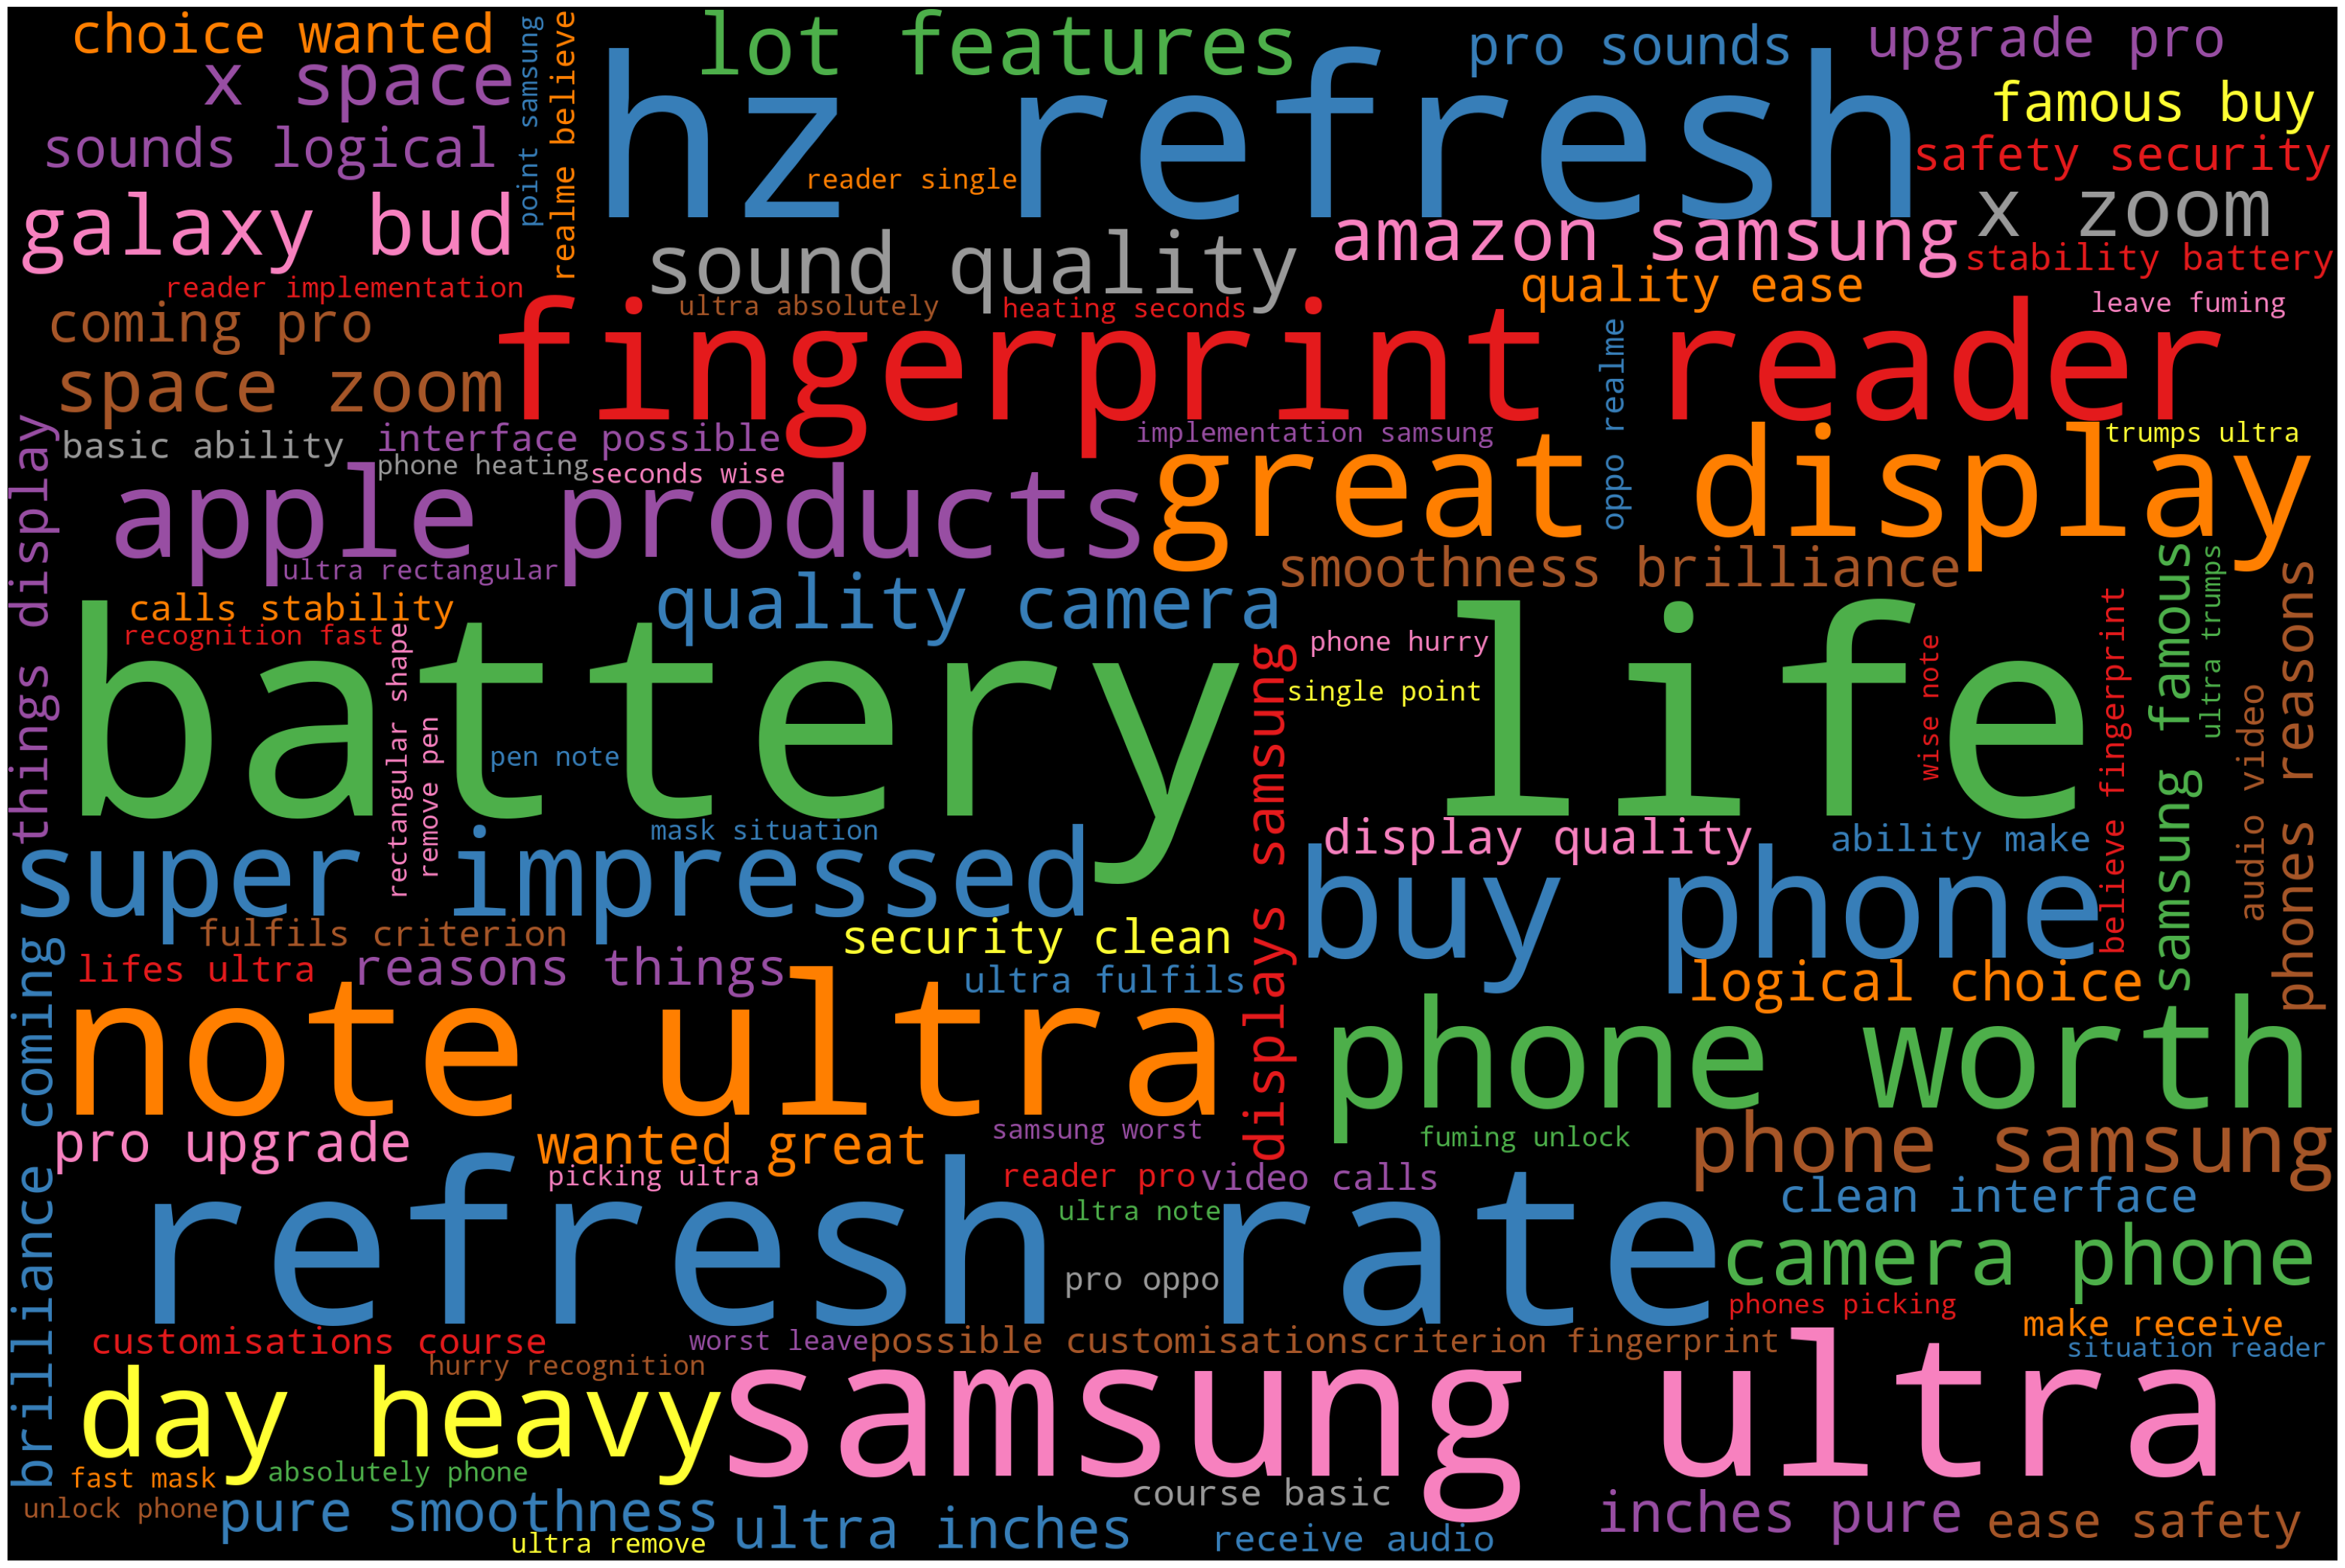

In [143]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set1',stopwords=stopwords).generate(reviews)
# Plot
plot_cloud(wordcloud)

In world cloud,The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

As you can see, words like “refresh”,“rate” “battery life” “great display” and “samsung” stand out since they were used more frequently in the original text.


## Emotion Mining

In [144]:
# forming sentence using sent tokenize
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(samsung_reviews))
sentences

['\nS20 Ultra is 6.9 inches of pure smoothness and brilliance.',
 'I am coming from One Plus 7pro and was looking to upgrade.',
 '8 Pro sounds like a logical choice, but after having used A70 for sometime, wanted to use the great displays Samsung is famous for.Most people buy phones for various reasons.',
 'For me there are following things I look for:1.',
 'Display quality2.',
 'Ease of use3.',
 'Safety and security4.',
 'Clean interface with possible customisations5.',
 'Of course, the basic ability to make and receive audio/video calls with stability.6.',
 'Battery lifeS20 Ultra fulfils most above criterion, except maybe the fingerprint reader.',
 'I have used OP 7Pro, Oppo, Realme and Mi.',
 'Believe me, fingerprint reader implementation by Samsung is the worst.',
 'It will leave you fuming when you need to unlock phone in a hurry.',
 "Face recognition is fast, but with 'mask on' situation, face reader is of no use.That for me is the single bad point for all Samsung phones.Before p

In [145]:
# forming dataframe
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,\nS20 Ultra is 6.9 inches of pure smoothness a...
1,I am coming from One Plus 7pro and was looking...
2,"8 Pro sounds like a logical choice, but after ..."
3,For me there are following things I look for:1.
4,Display quality2.
...,...
1871,Using Samsung s20 Ultra for more than a month ...
1872,Its has a smooth 120Hz refresh rate with an aw...
1873,Soon then I discovered this amazing phone with...
1874,I'm totally loving the aura of this mobile.


### Emotion Lexicon - using Affin

In [146]:
affin=pd.read_excel('affin.xlsx')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [147]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [148]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
import spacy
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [149]:
# manual testing
calculate_sentiment(text='great')

3

In [150]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        0
1        0
2        6
3        0
4        0
        ..
1871     0
1872    23
1873     7
1874     3
1875     6
Name: sentiment_value, Length: 1876, dtype: int64

In [151]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       10
1       12
2       30
3        9
4        2
        ..
1871    21
1872    78
1873    15
1874     8
1875    10
Name: word_count, Length: 1876, dtype: int64

In [152]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
135,I should have ordered this from Samsung direct...,-5,39
1785,I should have ordered this from Samsung direct...,-5,39
1260,I should have ordered this from Samsung direct...,-5,39
810,I should have ordered this from Samsung direct...,-5,39
1035,I should have ordered this from Samsung direct...,-5,39
...,...,...,...
1047,Its has a smooth 120Hz refresh rate with an aw...,23,78
1722,Its has a smooth 120Hz refresh rate with an aw...,23,78
222,Its has a smooth 120Hz refresh rate with an aw...,23,78
1572,Its has a smooth 120Hz refresh rate with an aw...,23,78


### negative sentiment score of the whole review

In [153]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,\nS20 Ultra is 6.9 inches of pure smoothness a...,0,10
1,I am coming from One Plus 7pro and was looking...,0,12
3,For me there are following things I look for:1.,0,9
4,Display quality2.,0,2
9,Battery lifeS20 Ultra fulfils most above crite...,0,12
...,...,...,...
1858,Takes the experience to a whole new level over...,0,9
1860,I should have ordered this from Samsung direct...,-5,39
1866,I have never had a issue with anything .,0,9
1869,And the camera ..,0,4


### positive sentiment score of the whole review

In [154]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,"8 Pro sounds like a logical choice, but after ...",6,30
5,Ease of use3.,2,3
6,Safety and security4.,1,3
7,Clean interface with possible customisations5.,2,5
8,"Of course, the basic ability to make and recei...",2,13
...,...,...,...
1870,I have no words to describe it's camera ..Over...,2,19
1872,Its has a smooth 120Hz refresh rate with an aw...,23,78
1873,Soon then I discovered this amazing phone with...,7,15
1874,I'm totally loving the aura of this mobile.,3,8


### Plotting the sentiment value for whole review

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

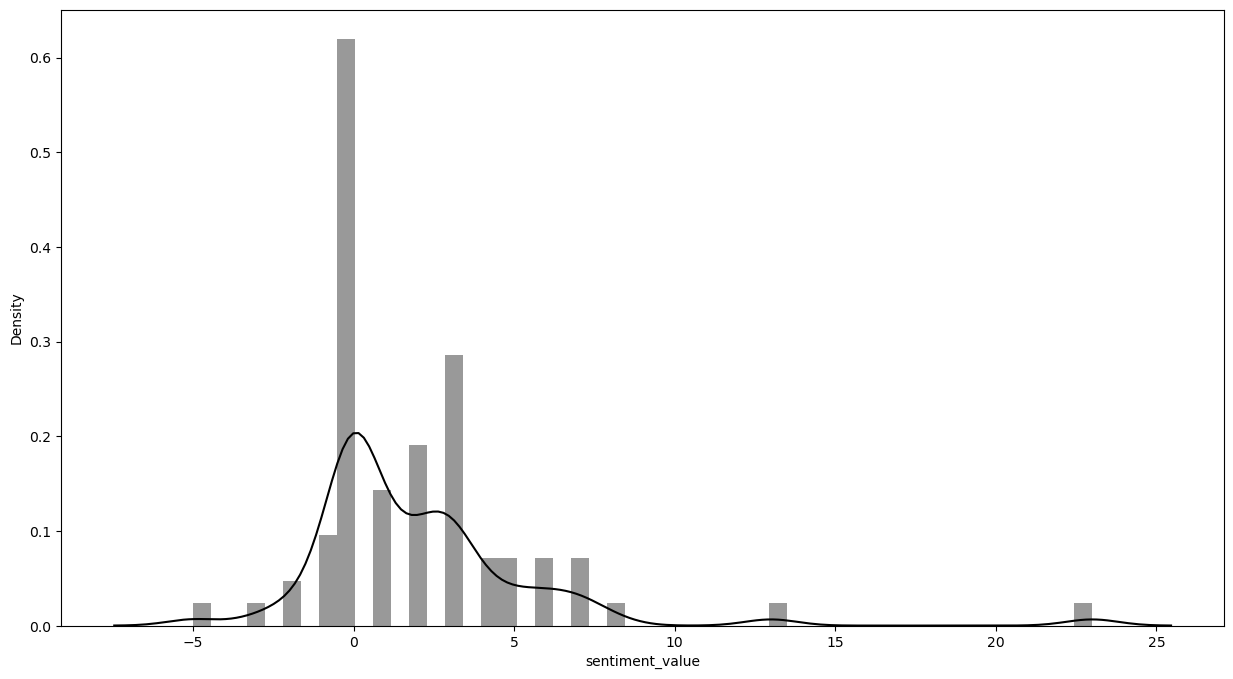

In [155]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(sent_df['sentiment_value'],color="black")

### Correlation analysis

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

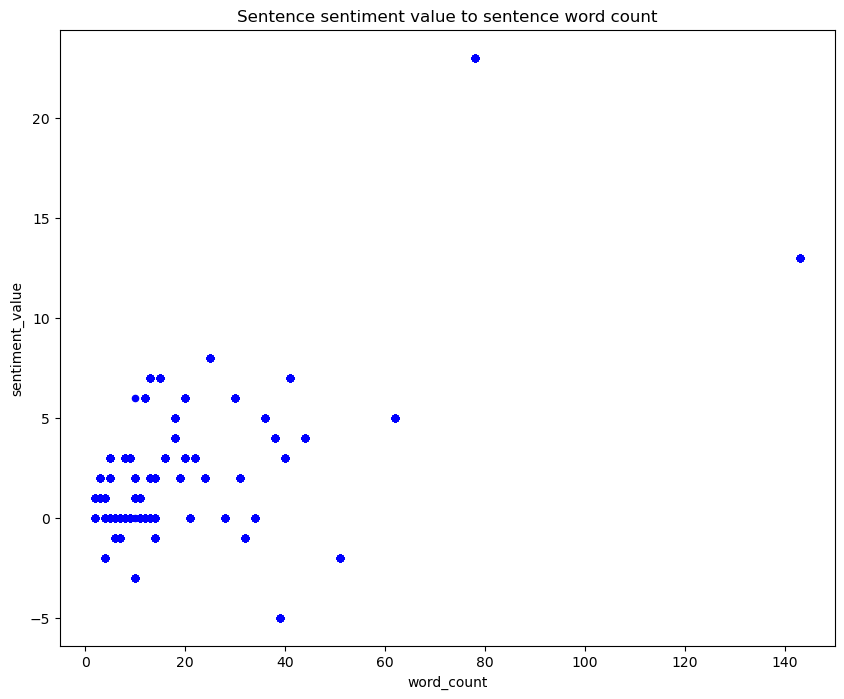

In [156]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(10,8),title='Sentence sentiment value to sentence word count',color='blue')